In [1]:
#This code replicates Model SIM (from Godley and Lavoie 2007)

In [2]:
#Import packages
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
#Set number of periods
nperiods=50

#Define variables
y = np.linspace(0, 0, nperiods)
cons = np.linspace(0, 0, nperiods)
gov = np.linspace(0, 0, nperiods)
tax = np.linspace(0, 0, nperiods)
yd = np.linspace(0, 0, nperiods)
h_h = np.linspace(0, 0, nperiods)
h_s = np.linspace(0, 0, nperiods)
n = np.linspace(0, 0, nperiods)
w = np.linspace(1, 1, nperiods)
sav = np.linspace(0, 0, nperiods)

#Identify coefficients
alpha1=0.6
alpha2=0.4
theta=0.2

In [4]:
#Create model using two loops (time and iterations)
i = 1
for i in range(1,nperiods):
    for j in range (1,40):
        y[i]=cons[i]+gov[i]                       #Output 
        cons[i]=alpha1*yd[i] + alpha2*h_h[i-1]    #Consumption
        n[i]=y[i]/w[i]                            #Employment
        tax[i]=theta*w[i]*n[i]                    #Taxes
        yd[i]=w[i]*n[i]-tax[i]                    #Disposable income
        h_s[i]=h_s[i-1]+gov[i]-tax[i]             #Supply of money
        h_h[i]=h_h[i-1]+yd[i]-cons[i]             #Demand for money
        sav[i]=h_h[i]-h_h[i-1]                    #Auxiliary variable: saving
        if i > 5: gov[i] = 20                     #Trigger: government spending
        j += 1
    i += 1

In [5]:
#Create auxiliary variable (time)
time = np.linspace(0, nperiods, nperiods)

[0, 50, 0, 110]

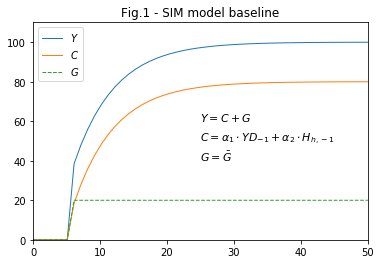

In [6]:
#Plot output components
plt.plot(time,y,lw=1)
plt.title('Fig.1 - SIM model baseline')
plt.plot(time,cons,lw=1)
plt.plot(time,gov,'--',lw=1)
plt.text(25, 60,r"$Y=C+G$", horizontalalignment='left', fontsize=11);
plt.text(25, 50,r"$C=\alpha_1 \cdot YD_{-1}+\alpha_2 \cdot H_{h,-1}$", horizontalalignment='left', fontsize=11);
plt.text(25, 40,r"$G=\bar{G}$", horizontalalignment='left', fontsize=11);
plt.legend(('$Y$','$C$','$G$'), loc='upper left')
plt.axis([0, 50, 0, 110])

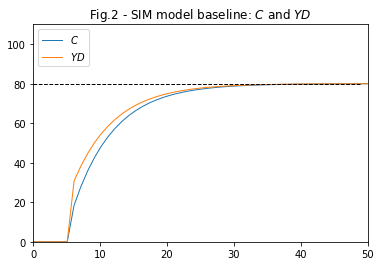

In [7]:
#Plot consumptiona and disposable income
plt.plot(time,cons,lw=1)
plt.title('Fig.2 - SIM model baseline: $C$ and $YD$')
plt.plot(time,yd,lw=1)
plt.legend(('$C$','$YD$'), loc='upper left')
plt.axis([0, 50, 0, 110])
ceiling = np.linspace(80, 80, nperiods)
plt.plot(ceiling,'k--',lw=1)

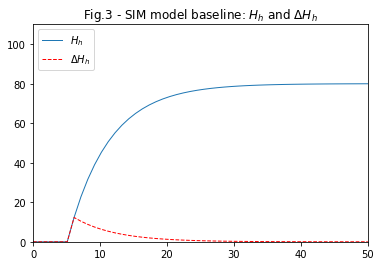

In [8]:
#Plot consumptiona and disposable income
plt.plot(time,h_h,lw=1)
plt.title('Fig.3 - SIM model baseline: $H_h$ and $\Delta H_h$')
plt.plot(time,sav,'r--',lw=1)
plt.legend(('$H_h$','$\Delta H_h$'), loc='upper left')
plt.axis([0, 50, 0, 110])
ceiling = np.linspace(80, 80, nperiods)